In [16]:
import pandas as pd 
import numpy as np 
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as FF
from wordcloud import WordCloud
import plotly.express as px
pd.set_option('display.max_columns', 50)

In [17]:
situaciones=pd.read_parquet('../Data/SituacionEstaciones/situaciones.parquet')
situaciones.head()



,activate,name,reservations_count,light,total_bases,free_bases,number,longitude,no_available,address,latitude,dock_bikes,_id
0,1,Puerta del Sol A,0,2,24,15,1a,-3.7024255,0,Puerta del Sol nº 1,40.4168961,8,2019-07-01 00:29:26.018083
1,1,Puerta del Sol B,0,2,24,14,1b,-3.7024207,0,Puerta del Sol nº 1,40.4170009,9,2019-07-01 00:29:26.018083
2,1,Miguel Moya,0,2,24,12,2,-3.7058415,0,Calle Miguel Moya nº 1,40.4205886,10,2019-07-01 00:29:26.018083
3,1,Plaza Conde Suchil,0,1,18,4,3,-3.7069171,0,Plaza del Conde Suchil nº 2-4,40.4302937,11,2019-07-01 00:29:26.018083
4,1,Malasaña,0,0,24,17,4,-3.7025875,0,Calle Manuela Malasaña nº 5,40.4285524,3,2019-07-01 00:29:26.018083


In [24]:
situaciones[['longitude', 'latitude']]=situaciones[['longitude', 'latitude']].apply(pd.to_numeric)
situaciones.loc[:,'weekDay']=situaciones['_id'].apply(lambda x: x.dayofweek)
situaciones.loc[:,'hour']=situaciones['_id'].apply(lambda x: x.hour)

In [20]:
def filtrarHoraDiaSeman(sit, dia, hora): 
    sit_filt=sit[ (sit['weekDay']==dia) & (sit['hour']==hora)]
    cols_grup=['number', 'longitude', 'latitude', 'name', 'total_bases']
    sit_filt2=sit_filt.groupby(cols_grup )[['free_bases', 'dock_bikes']].mean()
    
    return sit_filt2.reset_index()



In [23]:
def GraficoEstaciones(a): 
    fig = px.scatter_mapbox(a, lat="latitude", lon="longitude",  color = "free_bases",  width = 500, height = 500, zoom = 12, color_continuous_scale=px.colors.diverging.RdBu,
                            hover_data={'latitude':False,
                                        'longitude':False,
                                        'number': True,
                                        'name': True, 
                                        'dock_bikes': True, 
                                        'total_bases':True
                                        })
    fig.update_traces(mode="markers")
    fig.update_layout(hovermode="x unified")
    fig.update_layout(
        title='Bases BiciMad por Distrito',

        autosize=True,
        showlegend=True,
        width = 500,
        height = 500,
        mapbox=dict(
            bearing=0,
            center=dict(
                lat=40.435,
                lon=-3.69
            ),
            zoom=12,
            style= 'carto-positron' # 'open-street-map'
            
        ),
        hoverlabel_align = 'right'
    )
    fig.show()

In [21]:
# hovertemplate = '<b>Estación:'+bases['Número'].astype(str)+'</b>'
# hovertemplate+='<br><b>Distrito: </b>'+bases['Distrito']+'<br>'
# hovertemplate+='<b>Número de bases:</b> '+bases["Número de Plazas"].astype(str)
a=filtrarHoraDiaSeman(situaciones,0,7)
a['size']=0.1
fig = px.scatter_mapbox(a, lat="latitude", lon="longitude",  color = "free_bases",  width = 500, height = 500, zoom = 12, color_continuous_scale=px.colors.diverging.RdBu,
                        hover_data={'latitude':False,
                                    'longitude':False,
                                    'number': True,
                                    'name': True, 
                                    'dock_bikes': True, 
                                    'total_bases':True
                                    })
#fig.update_traces(hovertemplate = '<b>Estación: $%{name}''</b>'+'<br><b>Número de bases: {total_bases:str}</b>')
    
                  
# fig.add_trace(go.Scattermapbox(
#         lat = bases["Latitud"],
#         lon = bases["Longitud"],
#         mode='markers',
#         showlegend=False,
#         marker=go.scattermapbox.Marker(
#             size=bases["Número de Plazas"]*0.5,
#             opacity=0.7  ,
#             color = "white"
#             ),     
#        hovertemplate = 
#         '<b>Estación:'+bases['Número'].astype(str)+'</b>'+
#         '<br><b>Distrito: </b>'+bases['Distrito']+'<br>'+
#         '<b>Número de bases:</b> '+bases["Número de Plazas"].astype(str)
#     ))
fig.update_traces(mode="markers")
fig.update_layout(hovermode="x unified")
fig.update_layout(
    title='Bases BiciMad por Distrito',

    autosize=True,
    showlegend=True,
    width = 500,
    height = 500,
    mapbox=dict(
        bearing=0,
        center=dict(
            lat=40.435,
            lon=-3.69
        ),
        zoom=12,
        style= 'carto-positron' # 'open-street-map'
        
    ),
    hoverlabel_align = 'right'
)
fig.show()

<AxesSubplot:>

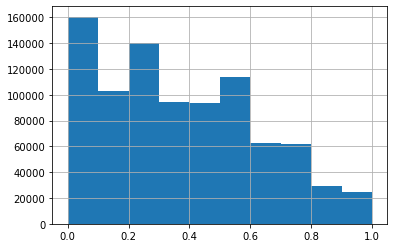

In [22]:
situaciones['aux']=situaciones.apply(lambda x:x['dock_bikes']/x['total_bases'], axis=1)
situaciones['aux'].hist()

In [3]:

def catDock: 
    
situaciones.loc[:,'Bicis Disponibles']=situaciones.dock_bikes.apply(lambda x: )

0    825524
1     50127
2      6808
3      1310
4         8
Name: reservations_count, dtype: int64